In [6]:
# Question 1: 

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load the Penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Function to create histograms with lines and rectangles marking statistics
def plot_species_flipper_length_stats(species_name, penguins):
    # Filter data for the species
    species_data = penguins[penguins['species'] == species_name]['flipper_length_mm'].dropna()
    
    # Calculate statistical metrics
    mean = species_data.mean()
    median = species_data.median()
    flipper_range = [species_data.min(), species_data.max()]
    iqr = np.percentile(species_data, [25, 75])  # 25th and 75th percentiles (IQR)
    std_dev = species_data.std()
    std_dev_range = [mean - 2*std_dev, mean + 2*std_dev]

    # Create a histogram for flipper_length_mm
    fig = px.histogram(species_data, nbins=20, labels={'value': 'Flipper Length (mm)'}, title=f'{species_name} - Flipper Length Distribution')
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', width=2, dash='dash'), annotation_text="Mean", annotation_position="top right")
    fig.add_vline(x=median, line=dict(color='green', width=2, dash='dash'), annotation_text="Median", annotation_position="top right")
    
    # Add vertical rectangles for range, IQR, and ±2 standard deviations
    fig.add_vrect(x0=flipper_range[0], x1=flipper_range[1], fillcolor="red", opacity=0.2, line_width=0, annotation_text="Range", annotation_position="top right")
    fig.add_vrect(x0=iqr[0], x1=iqr[1], fillcolor="yellow", opacity=0.3, line_width=0, annotation_text="IQR", annotation_position="top right")
    fig.add_vrect(x0=std_dev_range[0], x1=std_dev_range[1], fillcolor="purple", opacity=0.2, line_width=0, annotation_text="±2 Std Dev", annotation_position="top right")

    fig.update_layout(showlegend=False, xaxis_title="Flipper Length (mm)", yaxis_title="Count")
    fig.show()

# Plot for each species
for species in penguins['species'].dropna().unique():
    plot_species_flipper_length_stats(species, penguins)

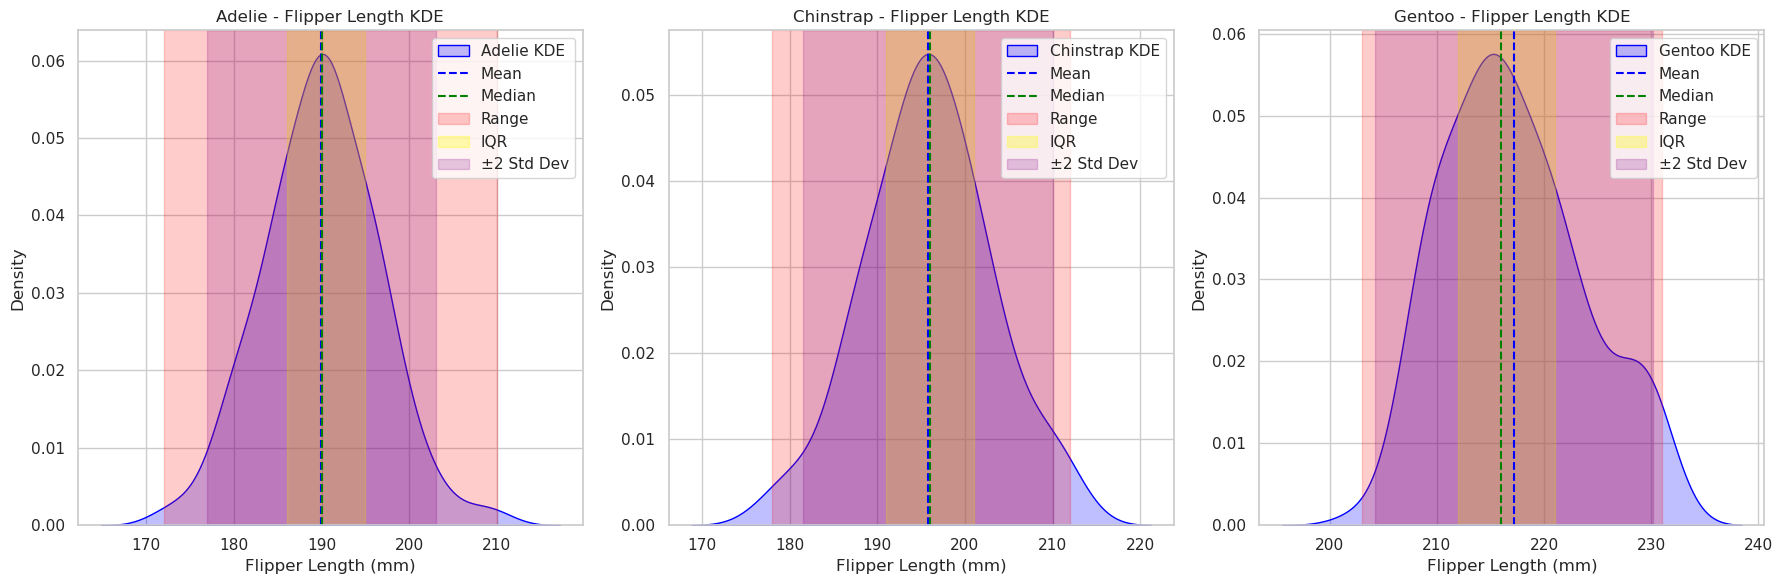

In [7]:
# Question 2: 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Set up the seaborn theme
sns.set(style="whitegrid")

# Function to create KDE plots with lines and rectangles marking statistics
def plot_species_flipper_length_kde(species_name, penguins, ax):
    # Filter data for the species
    species_data = penguins[penguins['species'] == species_name]['flipper_length_mm'].dropna()
    
    # Calculate statistical metrics
    mean = species_data.mean()
    median = species_data.median()
    flipper_range = [species_data.min(), species_data.max()]
    iqr = np.percentile(species_data, [25, 75])  # 25th and 75th percentiles (IQR)
    std_dev = species_data.std()
    std_dev_range = [mean - 2*std_dev, mean + 2*std_dev]

    # Plot KDE for flipper_length_mm with fill=True instead of shade=True
    sns.kdeplot(species_data, ax=ax, fill=True, color="blue", label=f'{species_name} KDE')
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='--', label='Median')

    # Add shaded regions for range, IQR, and ±2 standard deviations
    ax.axvspan(flipper_range[0], flipper_range[1], color='red', alpha=0.2, label="Range")
    ax.axvspan(iqr[0], iqr[1], color='yellow', alpha=0.3, label="IQR")
    ax.axvspan(std_dev_range[0], std_dev_range[1], color='purple', alpha=0.2, label="±2 Std Dev")

    # Labeling
    ax.set_title(f'{species_name} - Flipper Length KDE')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()

# Set up a row of 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot KDE for each species
species_list = penguins['species'].dropna().unique()
for i, species in enumerate(species_list):
    plot_species_flipper_length_kde(species, penguins, axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
# Question 3: 
# 1. Histogram
    # Pros:
        # Simple and Intuitive: Easy to understand and interpret, making it a great choice for initial data exploration.
        # Frequency Representation: Clearly shows the frequency of data points within specific ranges (bins).
        # Visualizes Distribution Shape: Helps in identifying the shape of the distribution (e.g., normal, skewed, bimodal).
        # Comparative Analysis: Can be used to compare multiple distributions by overlaying or using side-by-side histograms.
    # Cons:
        # Bin Size Sensitivity: The choice of bin size can significantly affect the histogram's appearance and interpretation. Too few or too many bins can misrepresent the data.
        # Loss of Detail: Can oversimplify the data, potentially hiding important features such as multimodality.
        # Outlier Identification: Does not distinctly identify outliers unless they fall outside the expected range of bins.

# 2. Box Plot (Box-and-Whisker Plot)
    # Pros:
        # Summarizes Key Statistics: Effectively summarizes data with median, quartiles, and potential outliers in a compact form.
        # Outlier Detection: Clearly identifies outliers, making it easy to spot unusual observations.
        # Comparison Across Groups: Excellent for comparing distributions across multiple categories or groups, allowing for quick visual comparisons.
        # Robust to Outliers: The presence of outliers does not distort the summary statistics shown in the box plot.
    # Cons:
        # Less Detail on Distribution Shape: Does not show the actual distribution shape or frequency of data points within the quartiles.
        # Limited Information: Provides summary statistics without conveying the underlying data structure or patterns.
        # Interpretation Difficulty: May be harder for some audiences to interpret compared to histograms or KDEs.

# 3. Kernel Density Estimator (KDE)
    # Pros:
        # Smooth Representation: Provides a continuous and smooth estimate of the probability density function, making it visually appealing.
        # Captures Multimodality: Effectively visualizes multimodal distributions, showing multiple peaks in the data.
        # No Bin Sensitivity: Unlike histograms, it does not rely on bin size, which can sometimes lead to better representation of the data.
        # Fine Detail: Offers a more detailed view of the distribution compared to histograms and can highlight subtle features.
    # Cons:
        # Bandwidth Sensitivity: The choice of bandwidth can greatly affect the KDE’s appearance. Too small a bandwidth can introduce noise, while too large can oversmooth the data.
        # Less Intuitive: May be less intuitive for some audiences compared to histograms, especially for those unfamiliar with density estimation.
        # Outlier Visibility: Outliers are not explicitly shown, which can make it harder to identify unusual observations in the data.
        # Computationally Intensive: Can be more computationally intensive than histograms, especially with large datasets.
        
# For these three 'data distribution' I like to use histograms as it is very common in our daily life, and it is easy to show the dataset and to see of there is any outlier. Histogram also provides me data that I can use for calculating other variables such as means, median etc. 

In [9]:
# Interaction log for Question 1-3: https://chatgpt.com/share/66f4ec5f-16ac-8000-90f6-661023ca8038

In [10]:
# Question 4: 
    # 1. Which datasets have similar means and similar variances: none
    # 2. Which datasets have similar means but quite different variances: A, B, C
    # 3. Which datasets have similar variances but quite different means: B, D
    # 4. Which datasets have quite different means and quite different variances, A, B, C, D

In [11]:
# Code for Q4
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


In [12]:
# Question 5: In a right-skewed distribution, most values are concentrated on the left side, with only a few higher outliers and a mean greater than the median. 
# Conversely, in a left-skewed distribution, most values are concentrated on the right side, with only a few lower outliers and a mean smaller than the median. 
# This is because the extreme values have a disproportionate effect on the mean.


In [13]:
#Interaction Log for Q5: https://chatgpt.com/share/66f4f169-e460-8000-bf9d-051fe0f8e71a

       restaurant id  category id    item id  serving size (oz)     calories  \
count     750.000000   750.000000  750.00000         395.000000   750.000000   
mean     2126.666667   113.685333  374.50000          10.612996   296.149333   
std       897.234043     9.956229  216.65064           7.286159   209.034366   
min      1000.000000   100.000000    0.00000           0.035274     0.000000   
25%      1000.000000   106.000000  187.25000           5.200000   150.000000   
50%      2000.000000   111.000000  374.50000          10.158912   260.000000   
75%      3000.000000   123.000000  561.75000          16.000000   410.000000   
max      3000.000000   130.000000  749.00000          32.000000  1880.000000   

       calories from fat  total fat (% daily value)  saturated fat (g)  \
count         260.000000                 260.000000         637.000000   
mean          127.096154                  21.815385           3.409105   
std           127.875914                  21.885199      

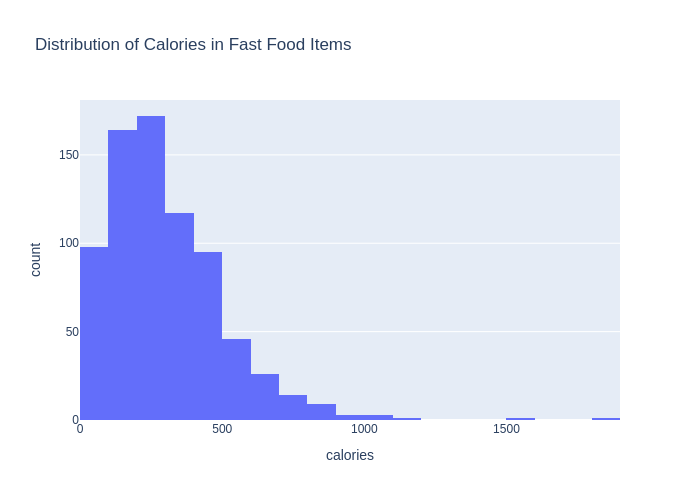

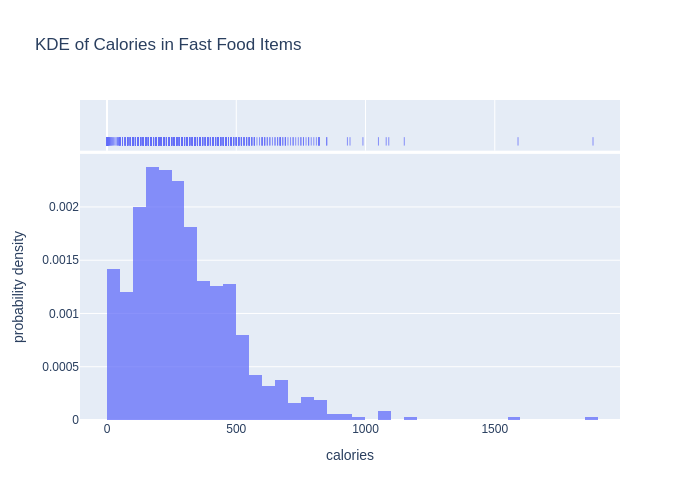

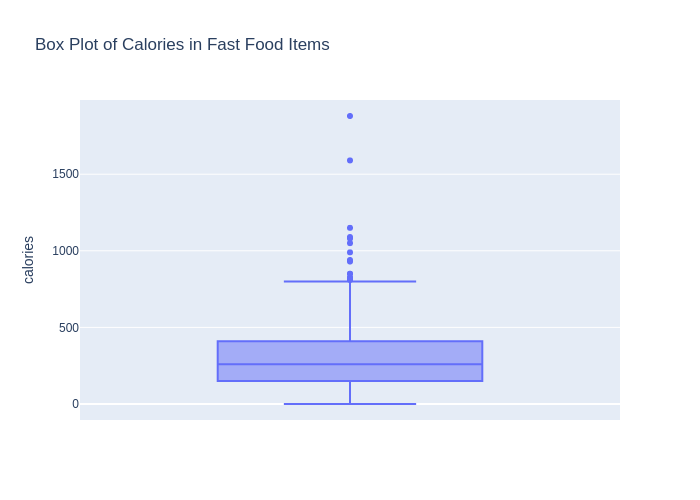

In [14]:
# Question 6: 
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Display summary statistics for the numerical columns
summary_stats = df.describe()
print(summary_stats)

# Create a histogram of the 'calories' column
histogram = px.histogram(df, x='calories', title='Distribution of Calories in Fast Food Items', nbins=30)
histogram.show(renderer="png")

# Create a KDE plot for 'calories'
kde_plot = px.histogram(df, x='calories', title='KDE of Calories in Fast Food Items', 
                         histnorm='probability density', marginal='rug')
kde_plot.update_traces(marker=dict(opacity=0.75))
kde_plot.show(renderer="png")

# Create a box plot for 'calories'
box_plot = px.box(df, y='calories', title='Box Plot of Calories in Fast Food Items')
box_plot.show(renderer="png")


In [ ]:
#  Interaction log for Q6: https://chatgpt.com/share/66f4f7d4-d4b4-8000-9472-0739bb81e3e9

In [18]:
# Question 7: 
    
import plotly.express as px

# Load the gapminder dataset
df = px.data.gapminder()

# Create the scatter plot with animation
fig = px.scatter(df, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country",
                 log_x=True, 
                 size_max=55, 
                 range_x=[100, 100000], 
                 range_y=[25, 90])

# Show the figure
fig.show()


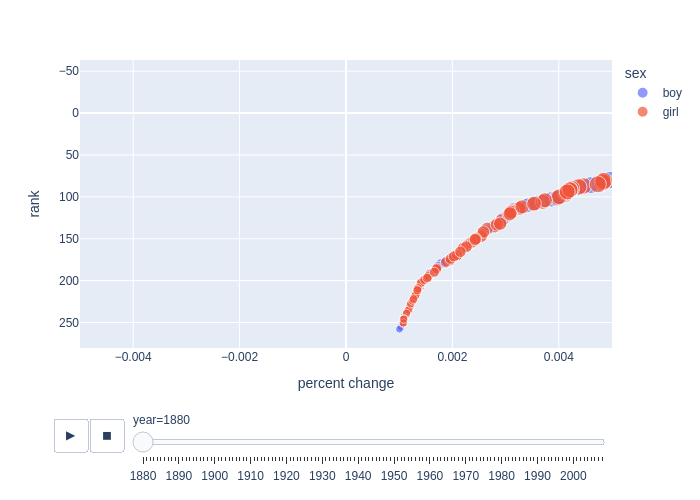

In [19]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make boy and girl names distinct by appending sex to name
bn['name'] = bn['name'] + " " + bn['sex']

# Rank names by prevalence (percent) within each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort values by name and year
bn = bn.sort_values(['name', 'year'])

# Calculate percent change from the previous year
bn['percent change'] = bn['percent'].diff()

# Handle new names by setting percent change for new names
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Filter out names with percent less than 0.001 (only "common" names)
bn = bn[bn.percent > 0.001]

# Sort by year for proper animation sequence
bn = bn.sort_values('year')

# Create the scatter plot with the specified parameters
fig = px.scatter(bn, 
                 x="percent change", 
                 y="rank", 
                 animation_frame="year", 
                 animation_group="name", 
                 size="percent", 
                 color="sex", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005])

# Reverse the y-axis to put rank 1 at the top
fig.update_yaxes(autorange='reversed')

# Show the figure with renderer="png" for GitHub/MarkUs
fig.show(renderer="png")


In [20]:
# Interaction log for Q7 and Q8: https://chatgpt.com/share/66f57864-dbc4-8000-b290-04b45a243722
